In [1]:
# ----------------------------------------------------------------------------------------------------
# 라이브러리 목록

# 기본 라이브러리
import re 
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# 개인 라이브러리 
from preparation_for_analysis.show_window import DataVisualizer
from preparation_for_analysis.encoding import DataFrameEncoder

# pandas 설정
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력

# matplotlib 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용하는 한글 폰트
matplotlib.rcParams['axes.unicode_minus'] = False  # 음수 기호 문제 해결

# preparation_for_analysis 설정
visualizer = DataVisualizer(line="=", length=100, start="#")
# ----------------------------------------------------------------------------------------------------

In [3]:
# ----------------------------------------------------------------------------------------------------
# learning 불러오기 
learning = pd.read_csv("C:\\Users\\ssalt\\Documents\\ev_price_predict_project\\data\\train\\A_df\\c_learning\\1_learning.csv",
                       sep=",",
                       header=0)

visualizer.show_df_info(title="learning.info", df=learning)
# ----------------------------------------------------------------------------------------------------


# Title: learning.info


# DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6747 entries, 0 to 6746
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            6747 non-null   object 
 1   Model         6747 non-null   object 
 2   Manufacturer  6747 non-null   object 
 3   Model_year    6747 non-null   int64  
 4   Drivetrain    6747 non-null   object 
 5   Warranty      6747 non-null   int64  
 6   Accident      6747 non-null   object 
 7   Condition     6747 non-null   object 
 8   Battery       4311 non-null   float64
 9   Mileage       6747 non-null   int64  
 10  Price         6747 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 579.9+ KB







In [5]:
# ----------------------------------------------------------------------------------------------------
# learning_encoding 구성하기

# onehot 인코더 호출
learning_encoder = DataFrameEncoder(df=learning,
                                    columns=["Model","Manufacturer","Drivetrain",
                                             "Accident","Condition"],
                                    ascending_order=[True,True,True,
                                                     True,True],
                                    sort_by_number=[False,False,False,
                                                    False,False])

# onehot 인코딩 변환 / learning_encoding 생성 
learning_encoding = learning_encoder.fit_transform(encoding_type="onehot")

# "Mileage", "Price"컬럼 생성
learning_encoding["Model_year"] = learning["Model_year"]
learning_encoding["Warranty"] = learning["Warranty"]
learning_encoding["Battery"] = learning["Battery"]
learning_encoding["Mileage"] = learning["Mileage"]
learning_encoding["Price"] = learning["Price"]

# learning_encoding 정보 확인
visualizer.show_df_info(title="learning_encoding.info",df=learning_encoding)
# ----------------------------------------------------------------------------------------------------


# Title: learning_encoding.info


# DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6747 entries, 0 to 6746
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EV6         6747 non-null   int64  
 1   ID4         6747 non-null   int64  
 2   ION5        6747 non-null   int64  
 3   ION6        6747 non-null   int64  
 4   IONIQ       6747 non-null   int64  
 5   KNE         6747 non-null   int64  
 6   M3          6747 non-null   int64  
 7   MS          6747 non-null   int64  
 8   MX          6747 non-null   int64  
 9   MY          6747 non-null   int64  
 10  Niro        6747 non-null   int64  
 11  Q4eT        6747 non-null   int64  
 12  RSeTGT      6747 non-null   int64  
 13  Soul        6747 non-null   int64  
 14  Tay         6747 non-null   int64  
 15  TayCT       6747 non-null   int64  
 16  TayGTS      6747 non-null   int64  
 17  eT          6747 non-null   int64  
 18  i3     

In [6]:
# ----------------------------------------------------------------------------------------------------
# 전체 상관행렬 계산
corr_matrix = learning_encoding.corr()

# 컬럼 분할 
model_cols = learning_encoding.columns[0:21]
manufacturer_cols = learning_encoding.columns[21:28]
drivetrain_cols = learning_encoding.columns[28:31]
accident_cols = learning_encoding.columns[31:33]
condition_cols = learning_encoding.columns[33:36]
modelyear_cols = learning_encoding.columns[36]
warranty_cols = learning_encoding.columns[37]
battery_cols = learning_encoding.columns[38]
mileage_cols = learning_encoding.columns[39]
price_cols = learning_encoding.columns[40]
# ----------------------------------------------------------------------------------------------------

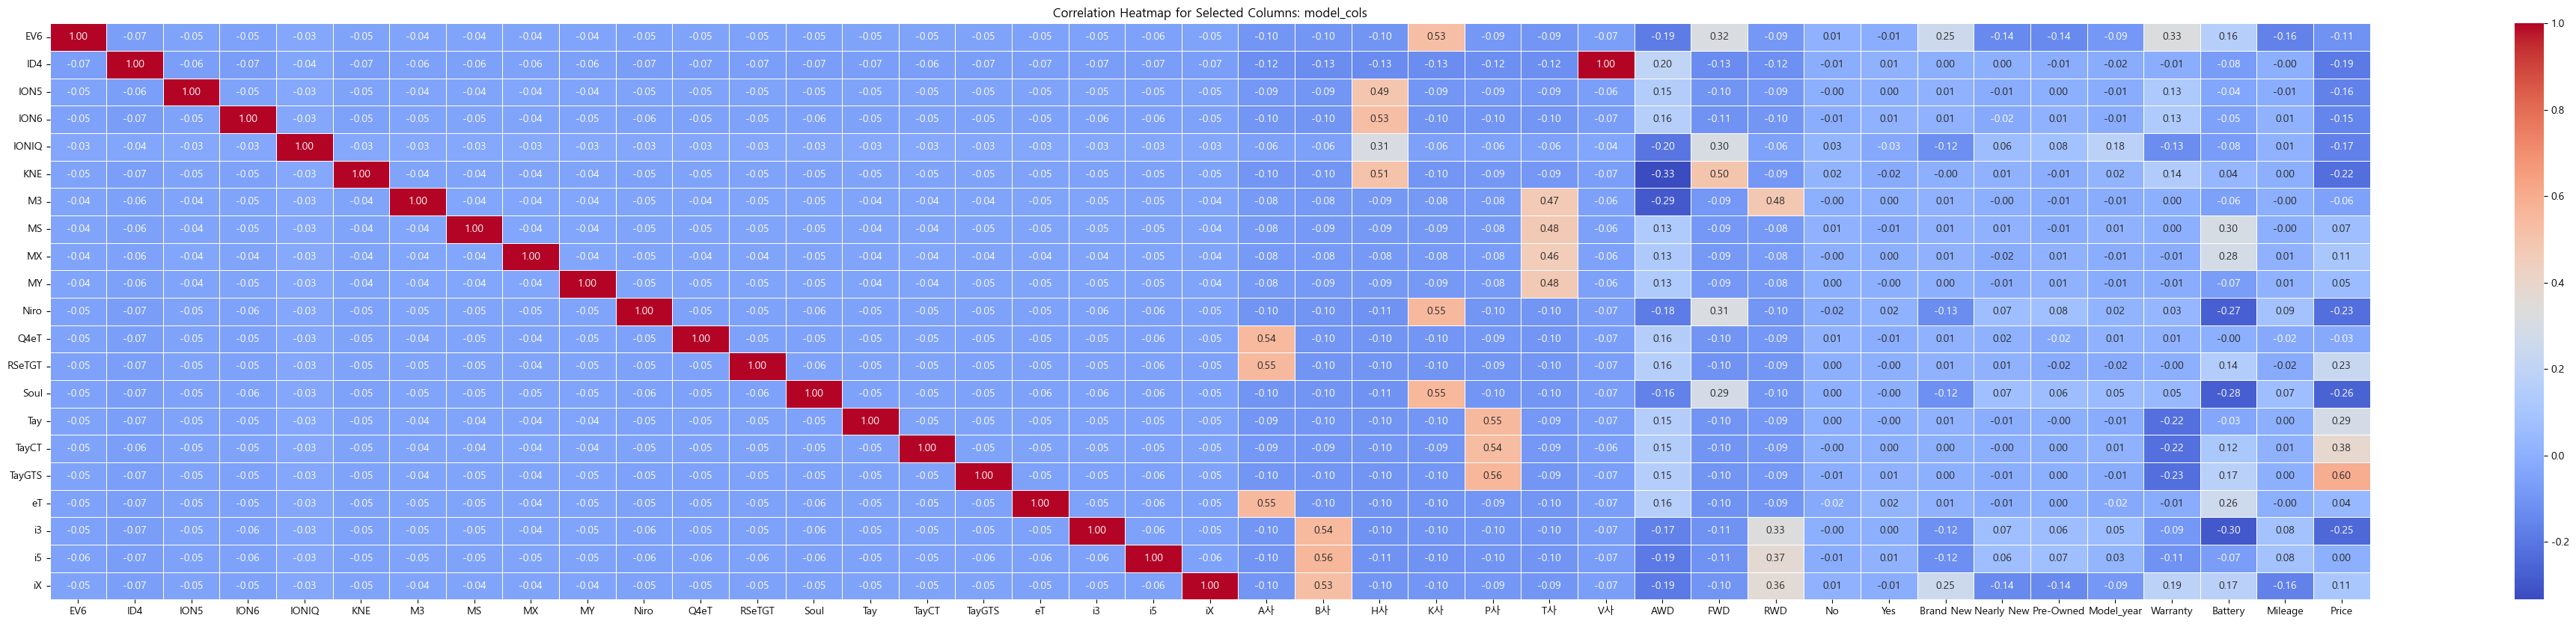

In [7]:
# ----------------------------------------------------------------------------------------------------
# 상관관계 "Model"중점으로 시각화 

# 전체 상관행렬에서 "Model" 컬럼만 추출
corr_selected = corr_matrix.loc[model_cols,:]

# 전체 상관행렬을 시각화한 후, 그 중에서 원하는 부분을 선택하여 시각화
plt.figure(figsize=(50, 10))
sns.heatmap(corr_selected, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation Heatmap for Selected Columns: model_cols")
plt.show()
# ----------------------------------------------------------------------------------------------------

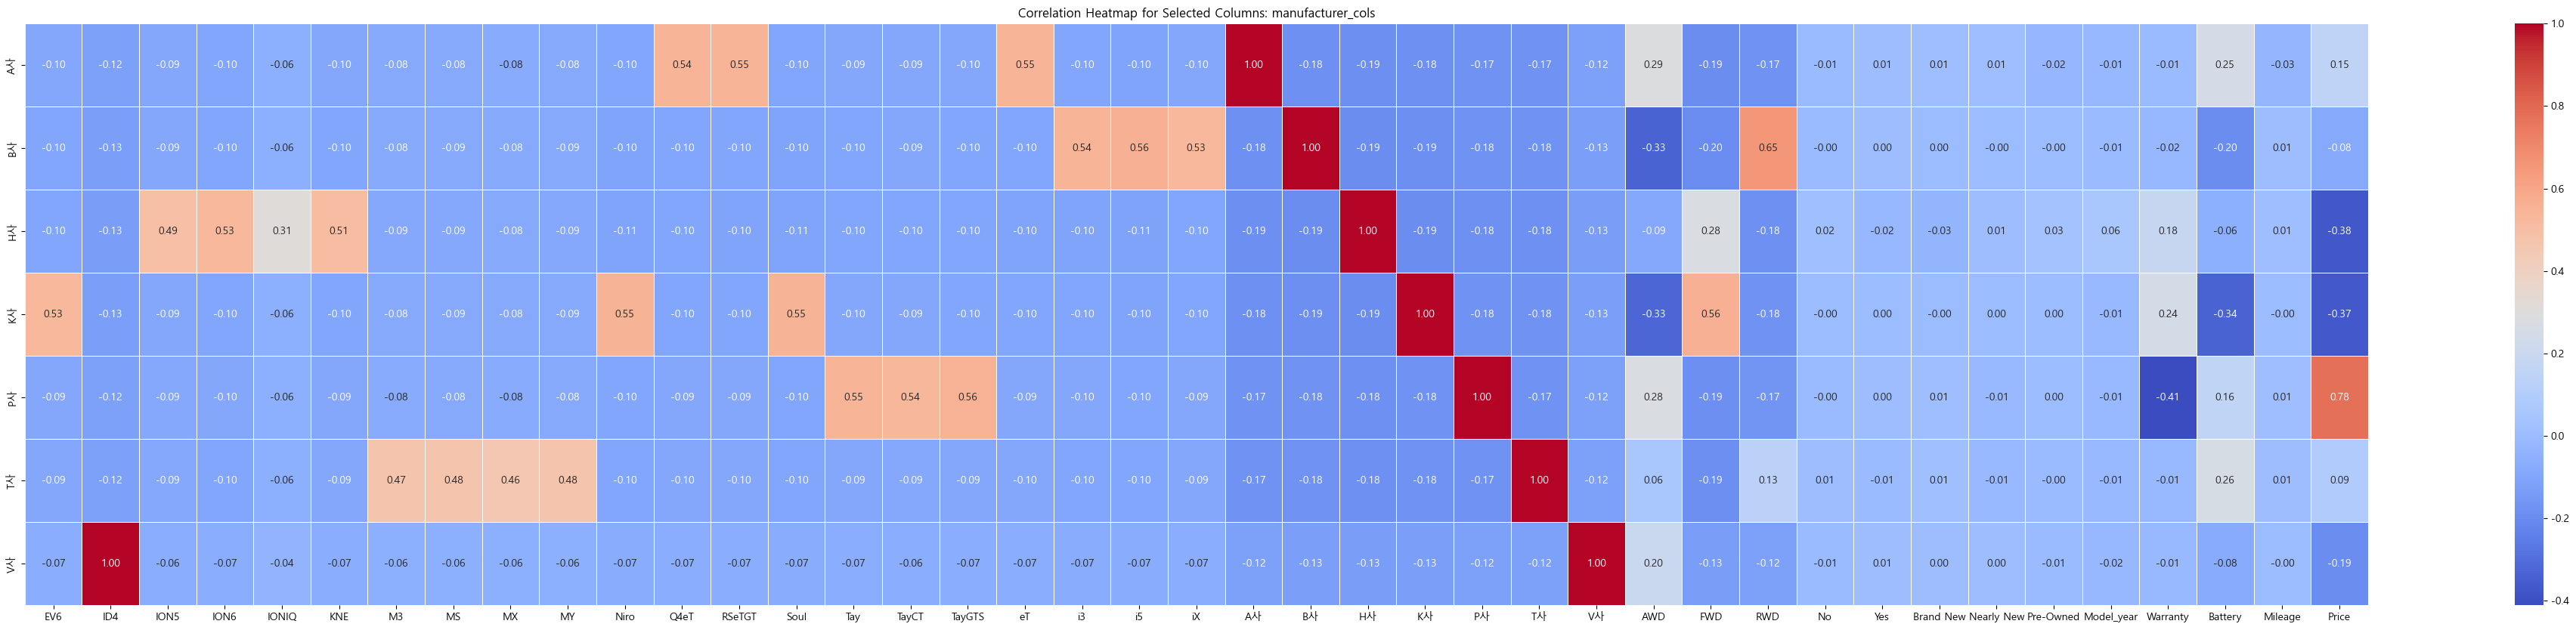

In [8]:
# ----------------------------------------------------------------------------------------------------
# 상관관계 "Manufacturer"중점으로 시각화 

# 전체 상관행렬에서 "Manufacturer" 컬럼만 추출
corr_selected = corr_matrix.loc[manufacturer_cols,:]

# 전체 상관행렬을 시각화한 후, 그 중에서 원하는 부분을 선택하여 시각화
plt.figure(figsize=(50, 10))
sns.heatmap(corr_selected, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation Heatmap for Selected Columns: manufacturer_cols")
plt.show()
# ----------------------------------------------------------------------------------------------------

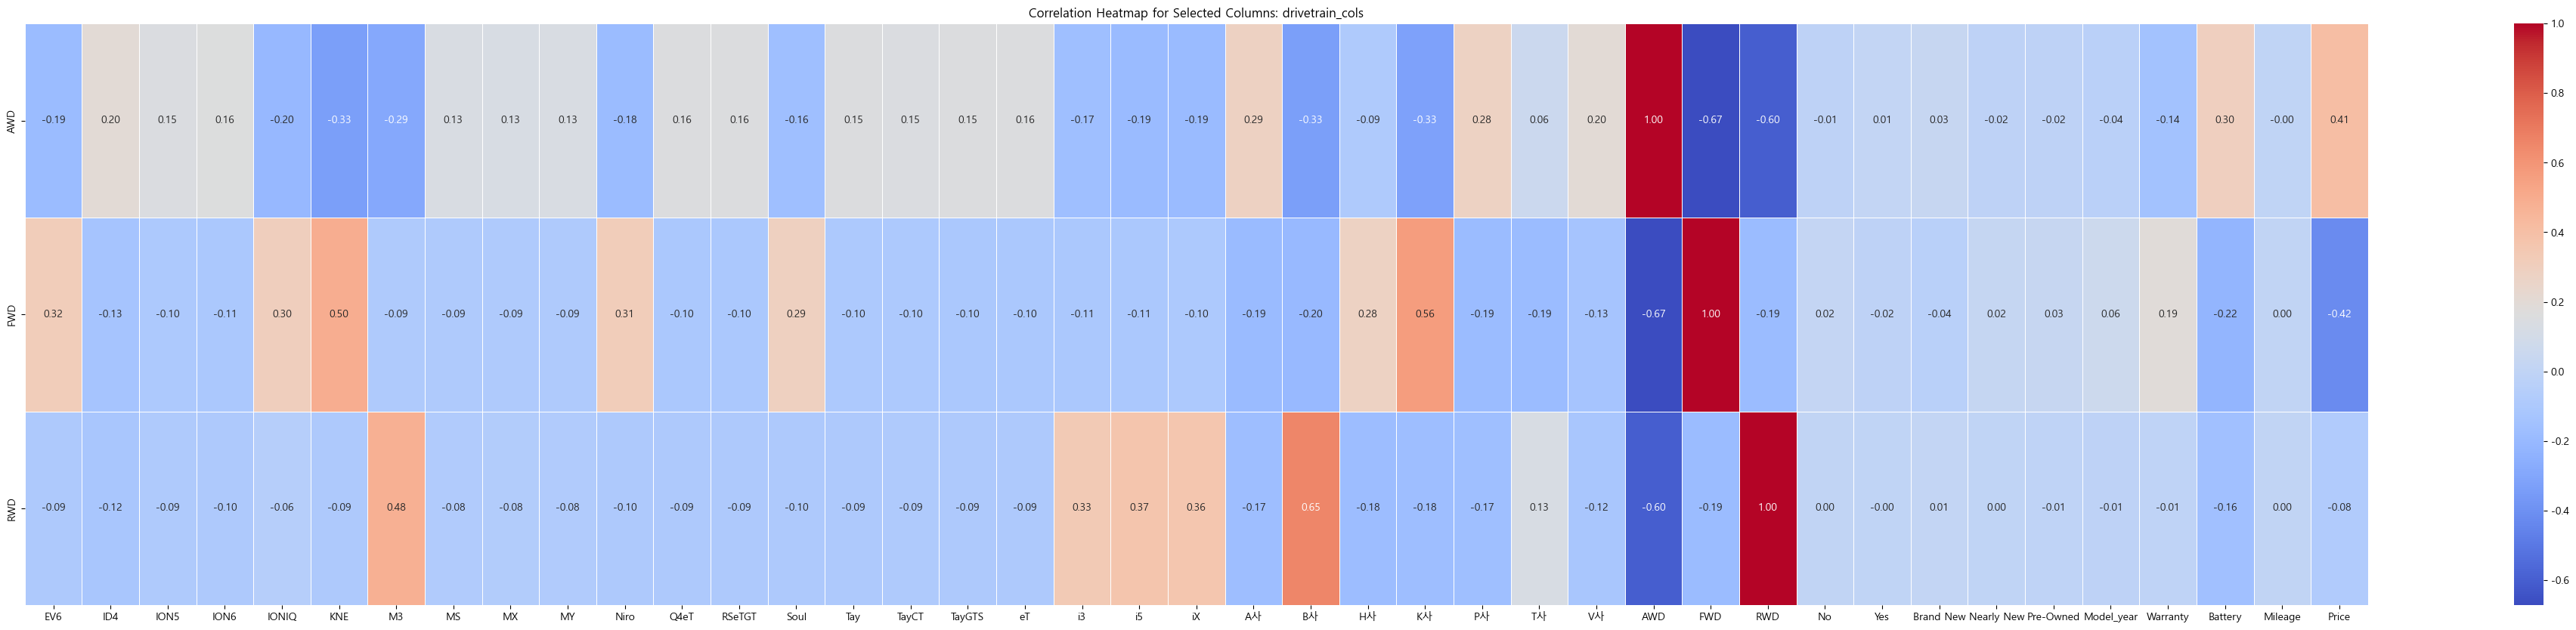

In [8]:
# ----------------------------------------------------------------------------------------------------
# 상관관계 "Drivetrain"중점으로 시각화 

# 전체 상관행렬에서 "Drivetrain" 컬럼만 추출
corr_selected = corr_matrix.loc[drivetrain_cols,:]

# 전체 상관행렬을 시각화한 후, 그 중에서 원하는 부분을 선택하여 시각화
plt.figure(figsize=(50, 10))
sns.heatmap(corr_selected, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation Heatmap for Selected Columns: drivetrain_cols")
plt.show()
# ----------------------------------------------------------------------------------------------------

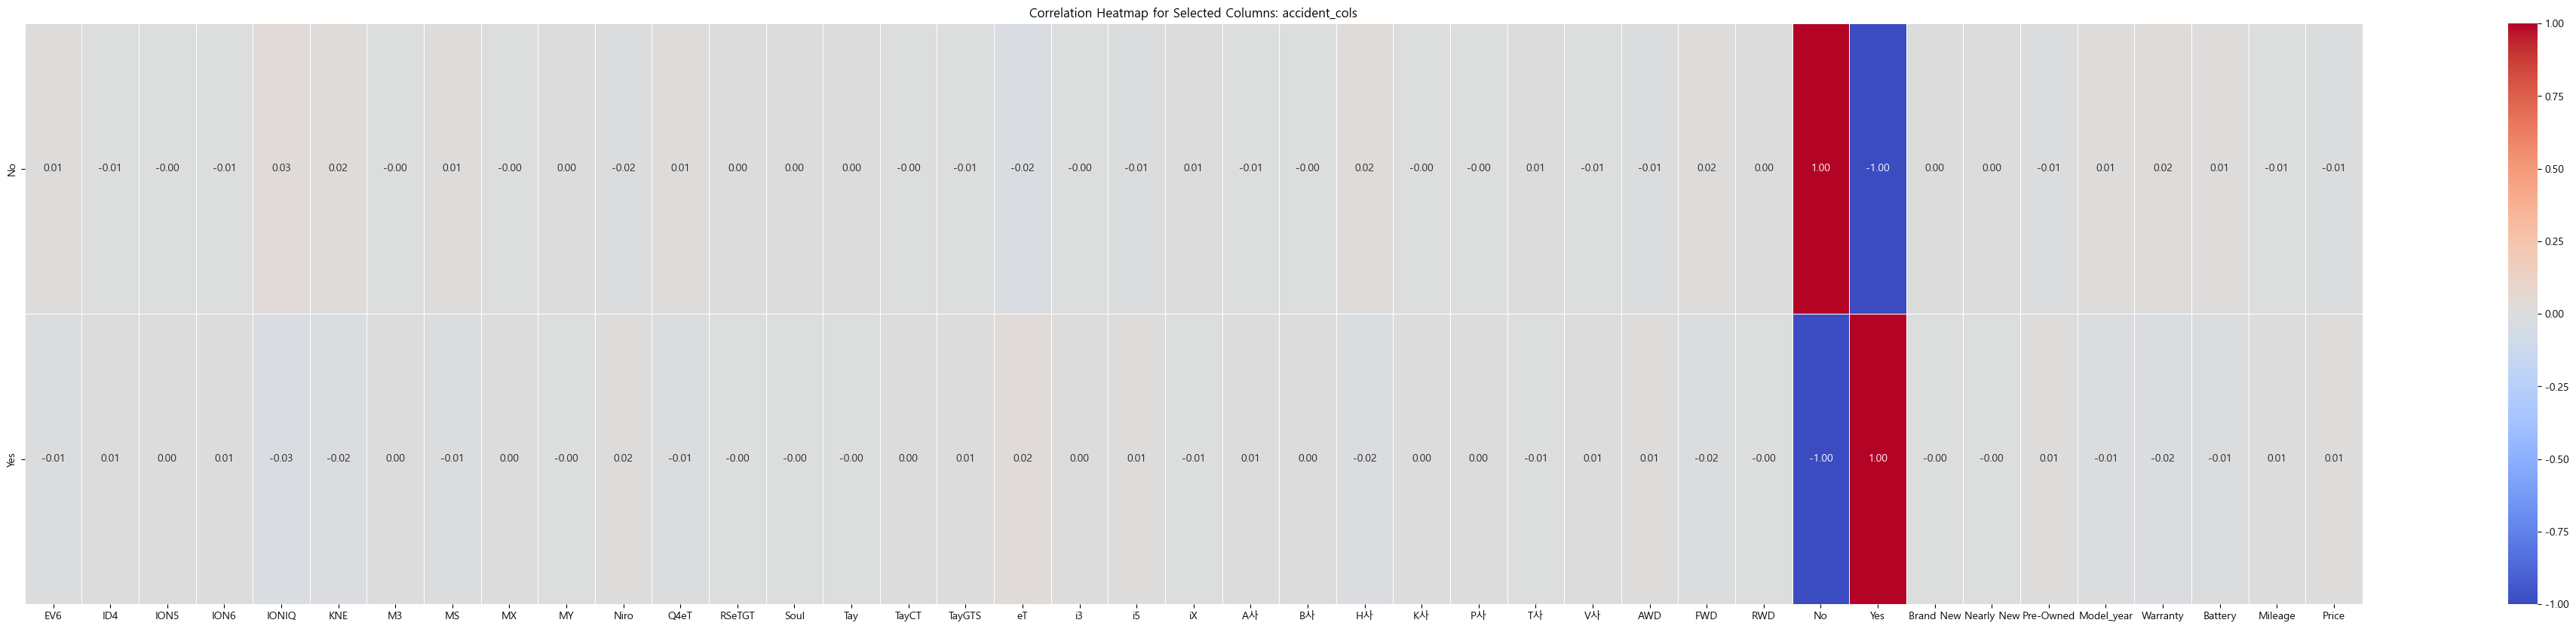

In [9]:
# ----------------------------------------------------------------------------------------------------
# 상관관계 "Accident"중점으로 시각화 

# 전체 상관행렬에서 "Accident" 컬럼만 추출
corr_selected = corr_matrix.loc[accident_cols,:]

# 전체 상관행렬을 시각화한 후, 그 중에서 원하는 부분을 선택하여 시각화
plt.figure(figsize=(50, 10))
sns.heatmap(corr_selected, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation Heatmap for Selected Columns: accident_cols")
plt.show()
# ----------------------------------------------------------------------------------------------------

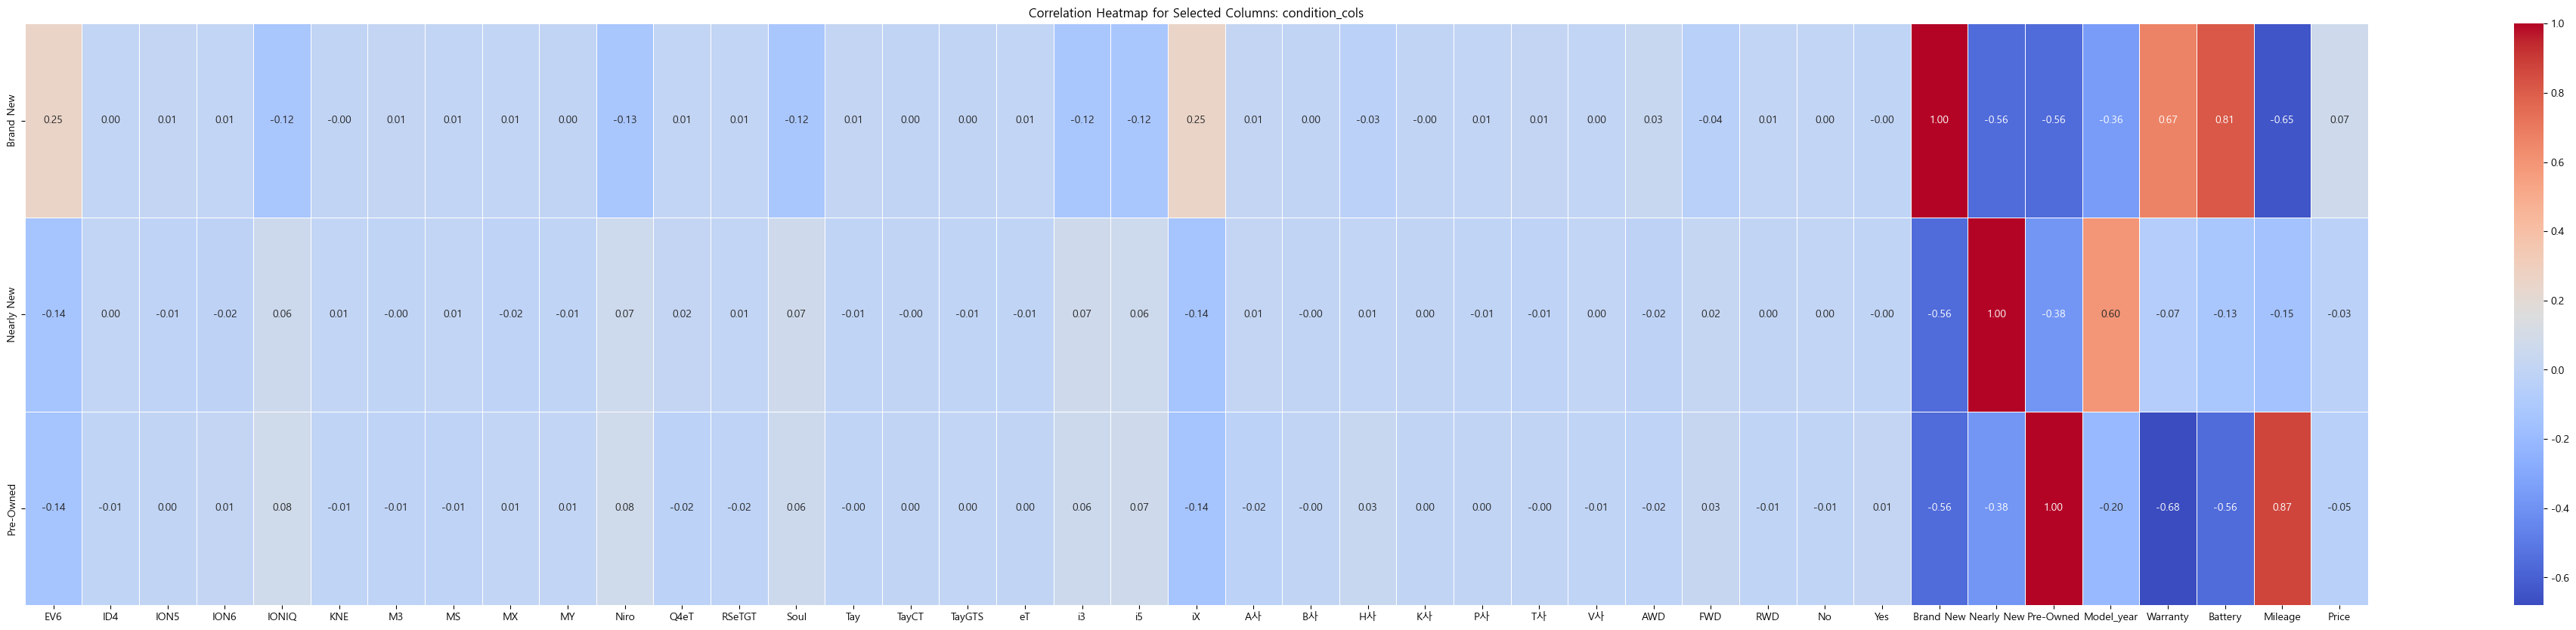

In [10]:
# ----------------------------------------------------------------------------------------------------
# 상관관계 "Condition"중점으로 시각화 

# 전체 상관행렬에서 "Condiiton" 컬럼만 추출
corr_selected = corr_matrix.loc[condition_cols,:]

# 전체 상관행렬을 시각화한 후, 그 중에서 원하는 부분을 선택하여 시각화
plt.figure(figsize=(50, 10))
sns.heatmap(corr_selected, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation Heatmap for Selected Columns: condition_cols")
plt.show()
# ----------------------------------------------------------------------------------------------------

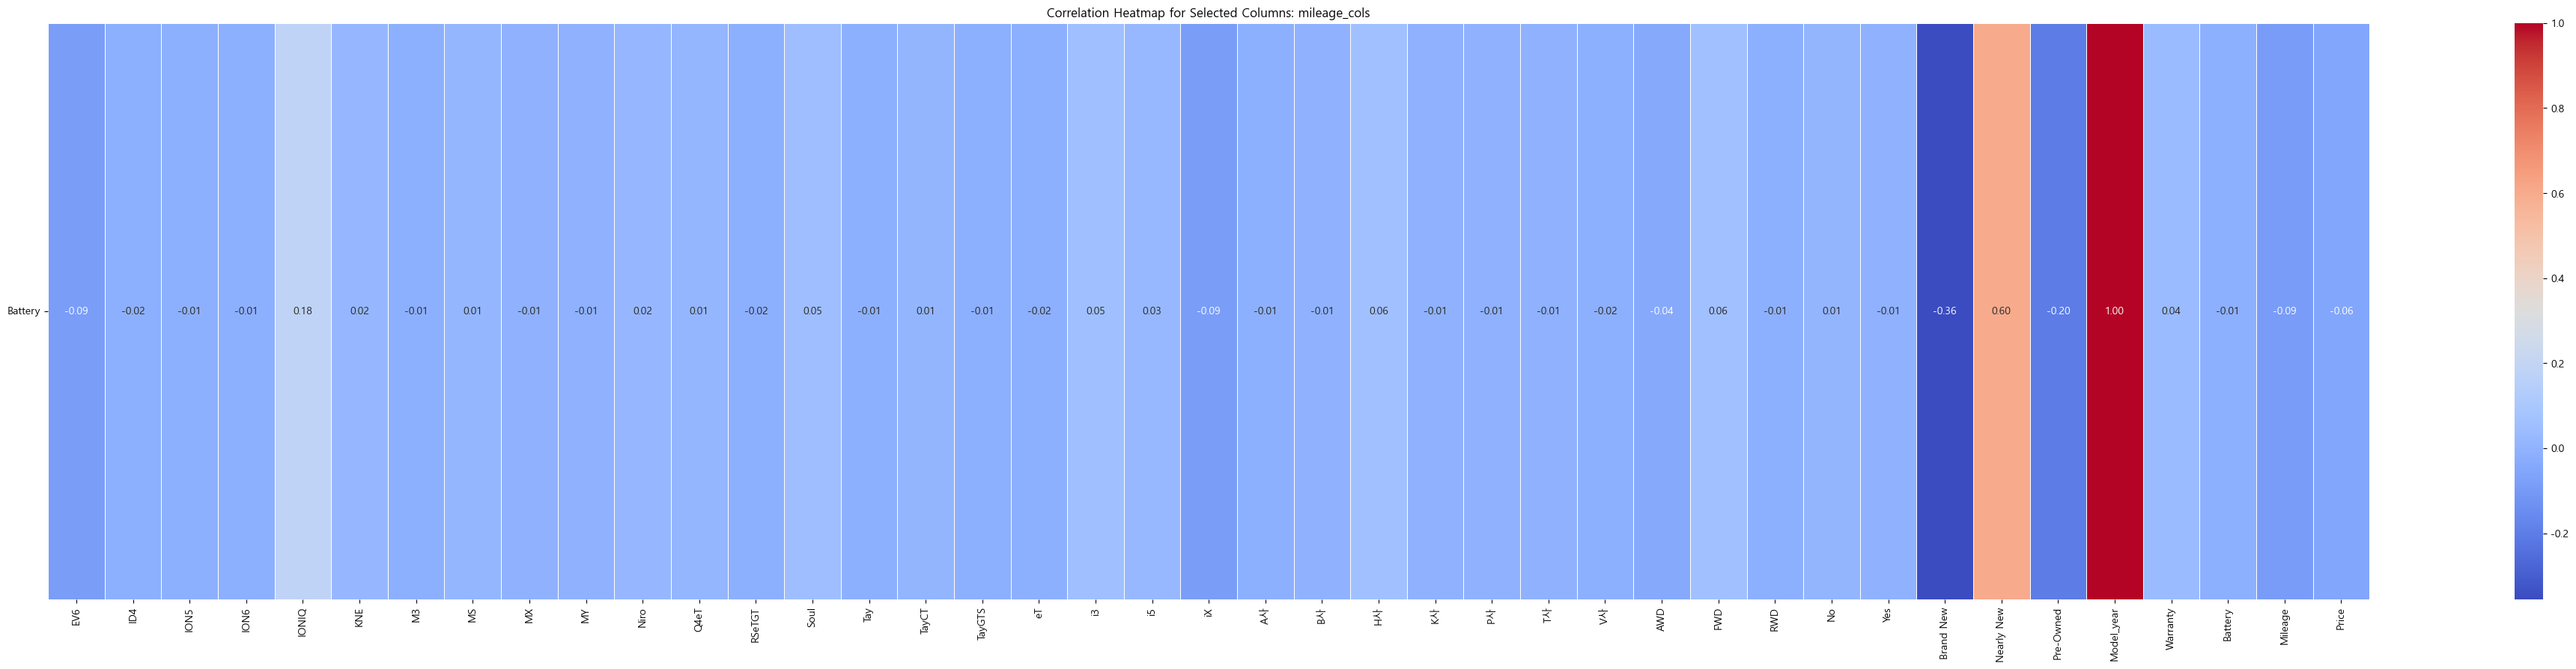

In [11]:
# ----------------------------------------------------------------------------------------------------
# 상관관계 "Model_year"중점으로 시각화 

# 전체 상관행렬에서 "Model_year" 컬럼만 추출
corr_selected = corr_matrix.loc[modelyear_cols,:]
corr_selected = corr_selected.values.reshape(1, -1) 

# 전체 상관행렬을 시각화한 후, 그 중에서 원하는 부분을 선택하여 시각화
plt.figure(figsize=(50, 10))
sns.heatmap(corr_selected, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f", 
            linewidths=0.5,
            xticklabels=learning_encoding.columns,
            yticklabels=["Battery"])
plt.title(f"Correlation Heatmap for Selected Columns: mileage_cols")
plt.xticks(rotation=90) 
plt.yticks(rotation=0) 
plt.show()
# ----------------------------------------------------------------------------------------------------

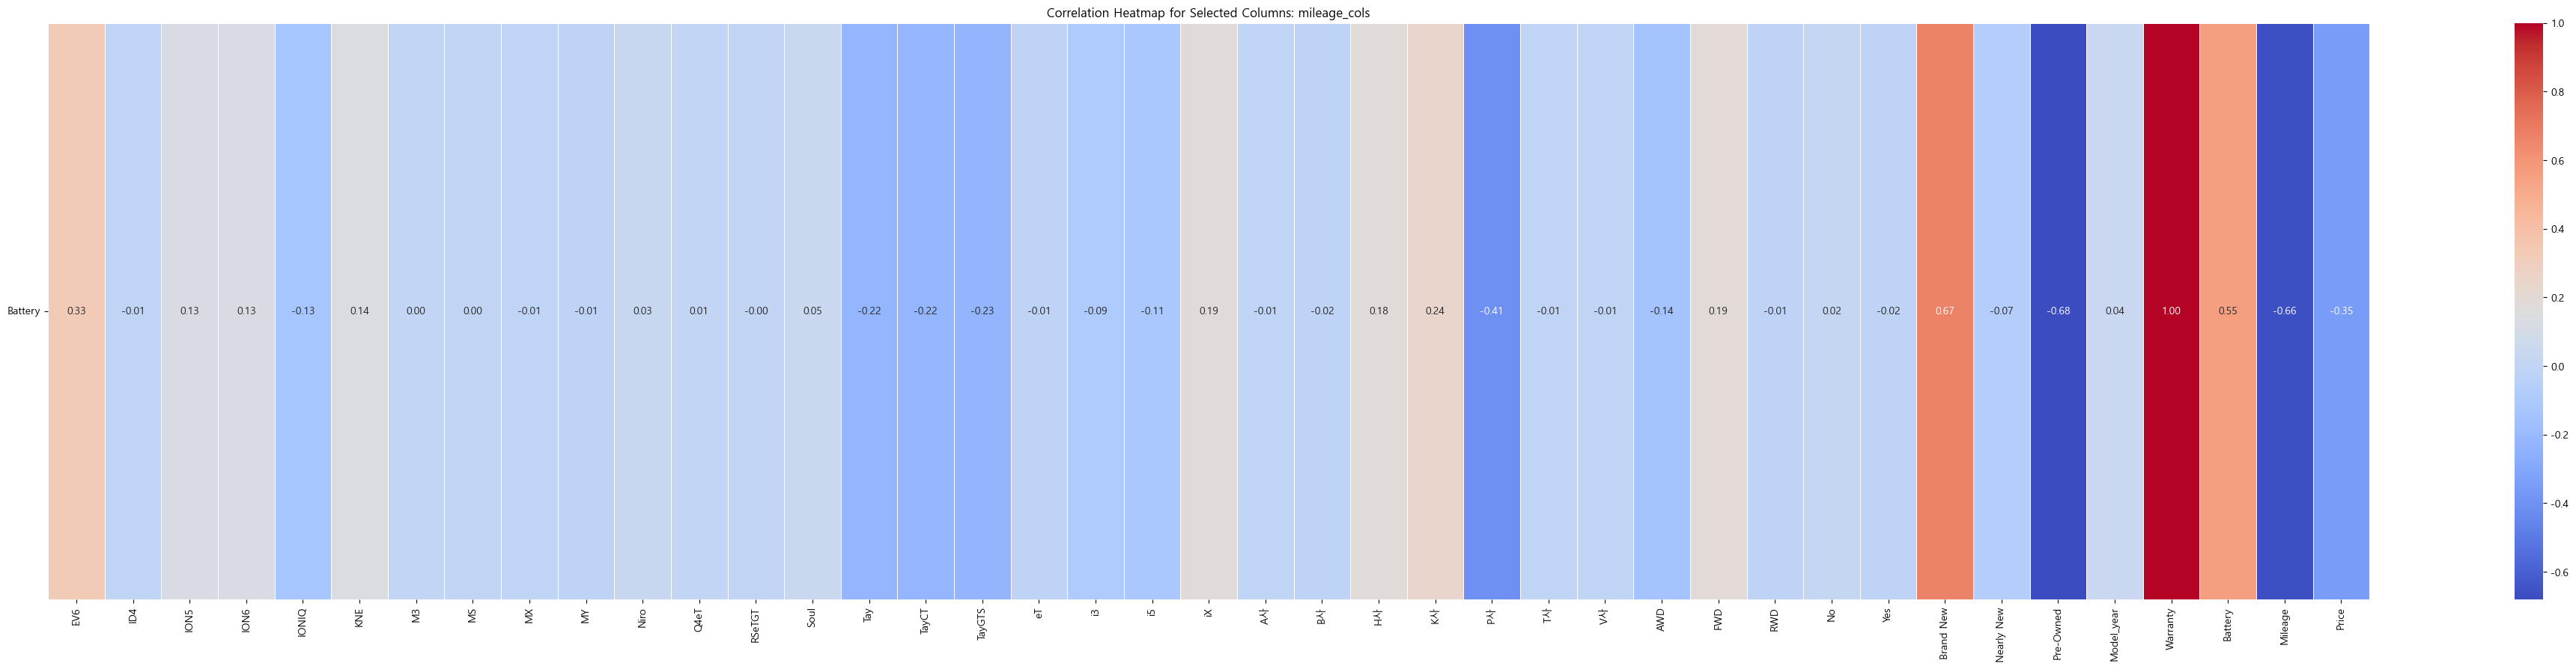

In [12]:
# ----------------------------------------------------------------------------------------------------
# 상관관계 "Warranty"중점으로 시각화 

# 전체 상관행렬에서 "Warranty" 컬럼만 추출
corr_selected = corr_matrix.loc[warranty_cols,:]
corr_selected = corr_selected.values.reshape(1, -1) 

# 전체 상관행렬을 시각화한 후, 그 중에서 원하는 부분을 선택하여 시각화
plt.figure(figsize=(50, 10))
sns.heatmap(corr_selected, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f", 
            linewidths=0.5,
            xticklabels=learning_encoding.columns,
            yticklabels=["Battery"])
plt.title(f"Correlation Heatmap for Selected Columns: mileage_cols")
plt.xticks(rotation=90) 
plt.yticks(rotation=0) 
plt.show()
# ----------------------------------------------------------------------------------------------------

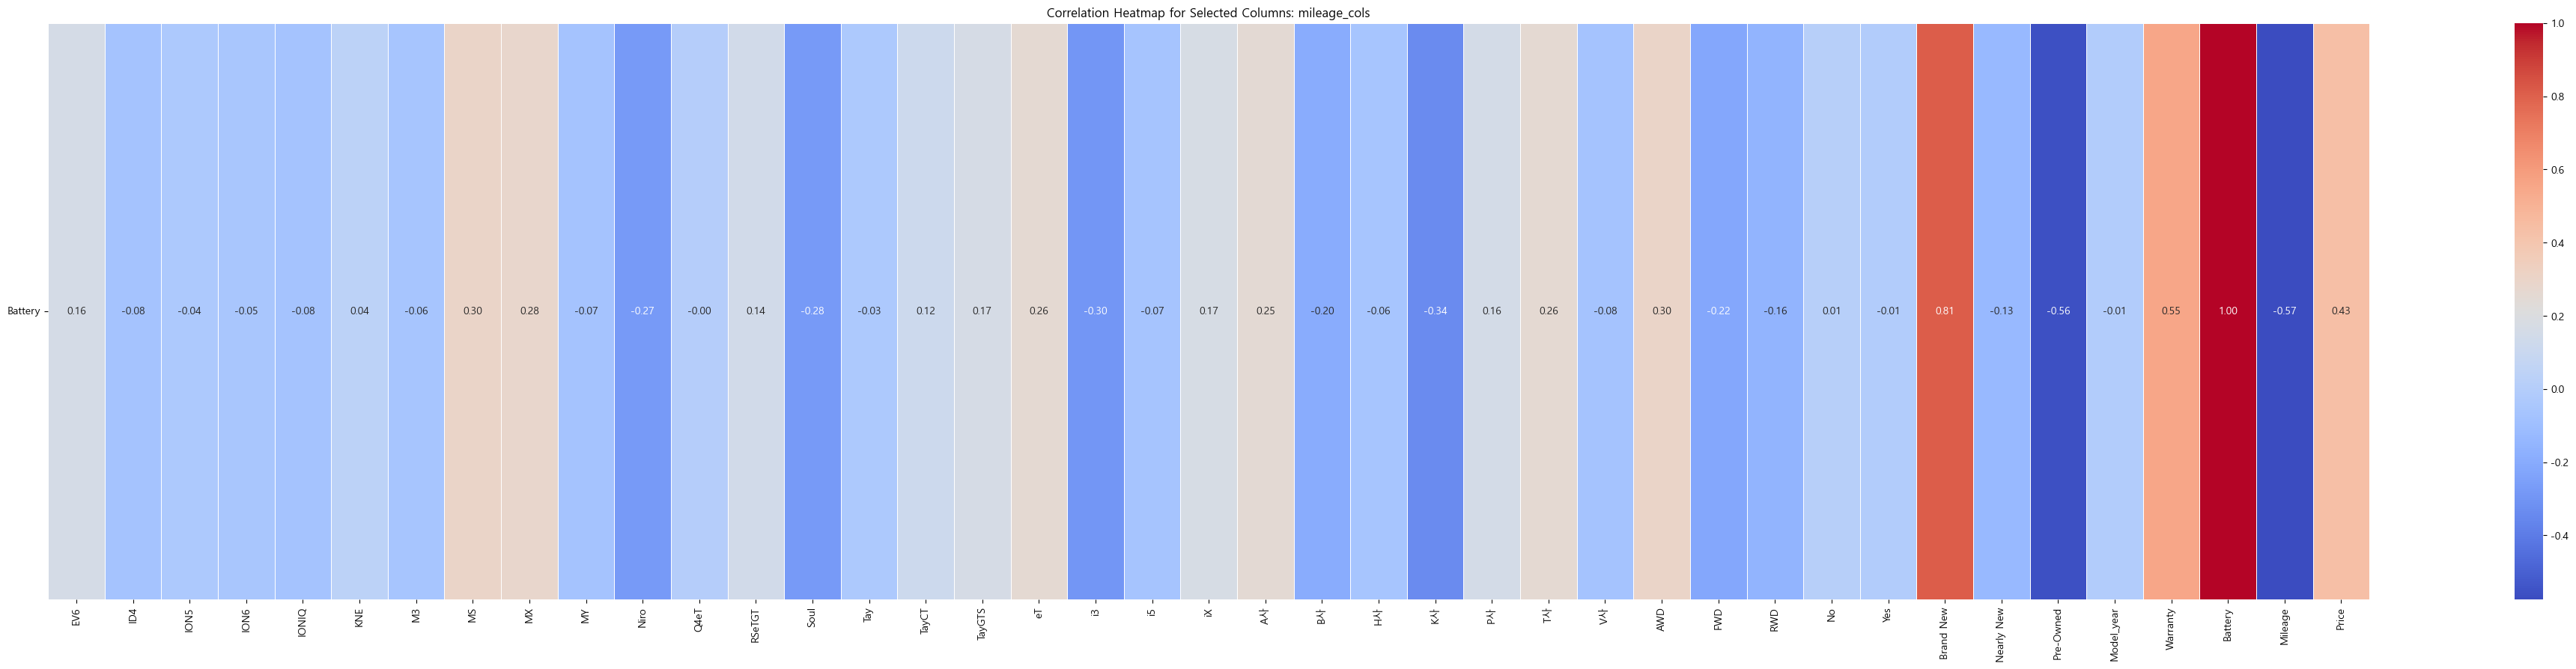

In [13]:
# ----------------------------------------------------------------------------------------------------
# 상관관계 "Battery"중점으로 시각화 

# 전체 상관행렬에서 "Battery" 컬럼만 추출
corr_selected = corr_matrix.loc[battery_cols,:]
corr_selected = corr_selected.values.reshape(1, -1) 

# 전체 상관행렬을 시각화한 후, 그 중에서 원하는 부분을 선택하여 시각화
plt.figure(figsize=(50, 10))
sns.heatmap(corr_selected, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f", 
            linewidths=0.5,
            xticklabels=learning_encoding.columns,
            yticklabels=["Battery"])
plt.title(f"Correlation Heatmap for Selected Columns: mileage_cols")
plt.xticks(rotation=90) 
plt.yticks(rotation=0) 
plt.show()
# ----------------------------------------------------------------------------------------------------

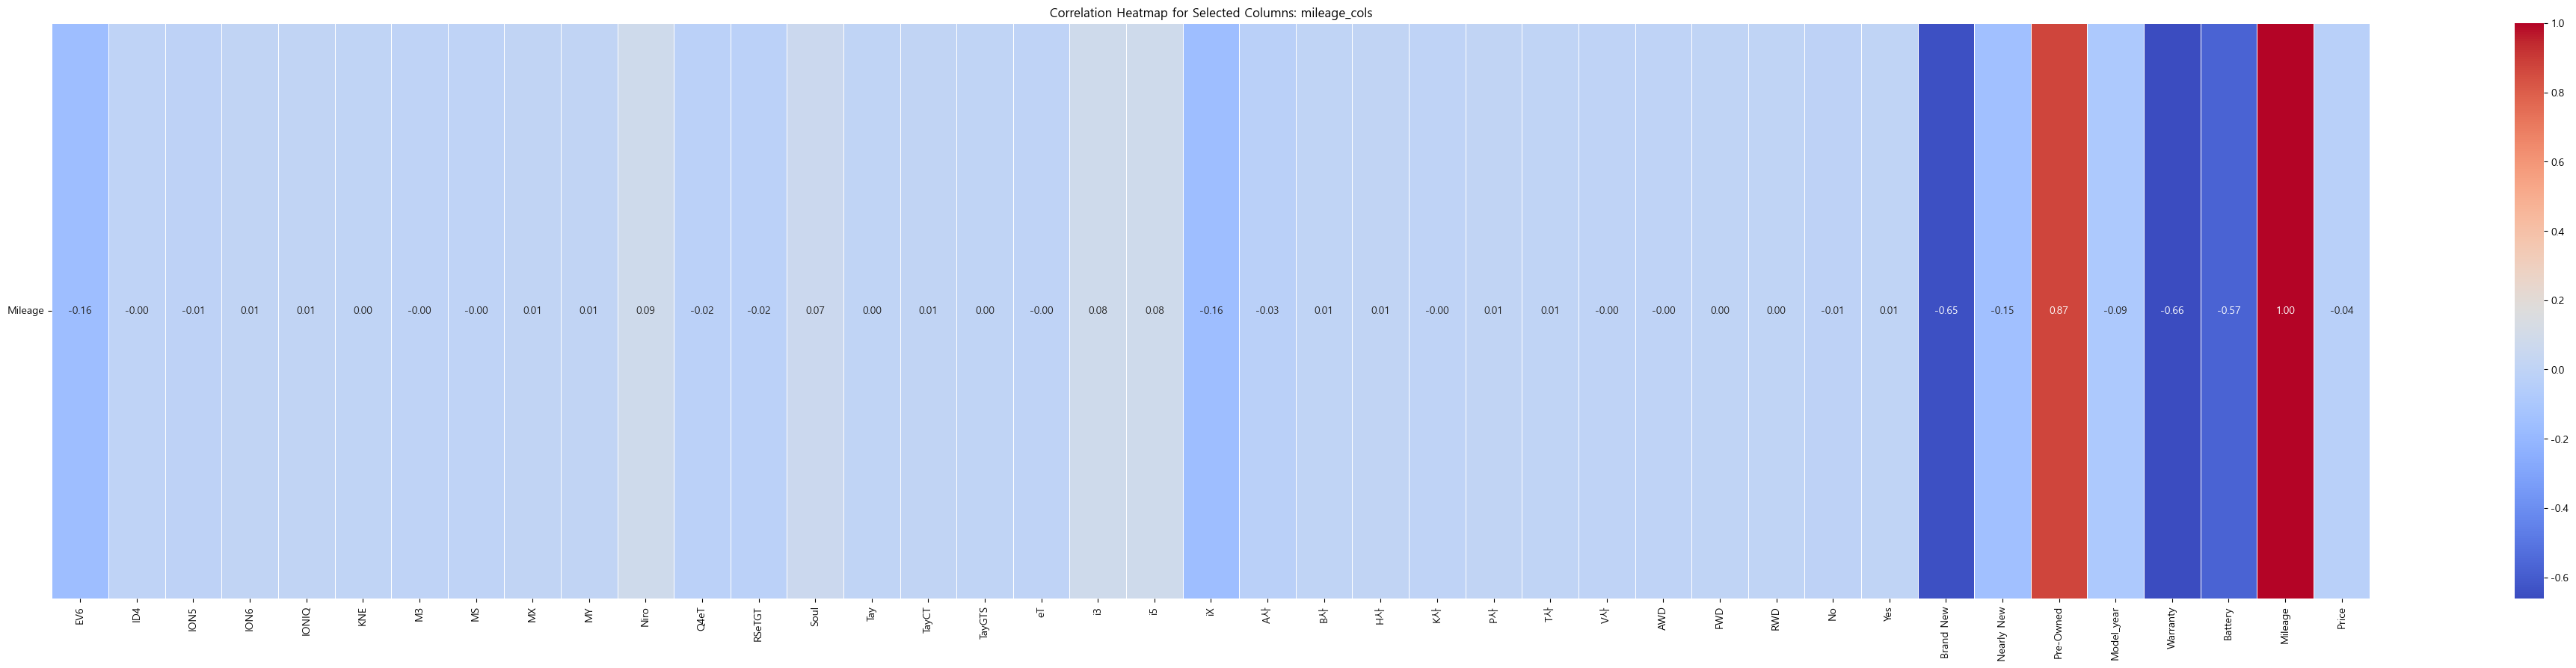

In [14]:
# ----------------------------------------------------------------------------------------------------
# 상관관계 "Mileage"중점으로 시각화 

# 전체 상관행렬에서 "mileage" 컬럼만 추출
corr_selected = corr_matrix.loc[mileage_cols,:]
corr_selected = corr_selected.values.reshape(1, -1) 

# 전체 상관행렬을 시각화한 후, 그 중에서 원하는 부분을 선택하여 시각화
plt.figure(figsize=(50, 10))
sns.heatmap(corr_selected, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f", 
            linewidths=0.5,
            xticklabels=learning_encoding.columns,
            yticklabels=["Mileage"])
plt.title(f"Correlation Heatmap for Selected Columns: mileage_cols")
plt.xticks(rotation=90) 
plt.yticks(rotation=0) 
plt.show()
# ----------------------------------------------------------------------------------------------------

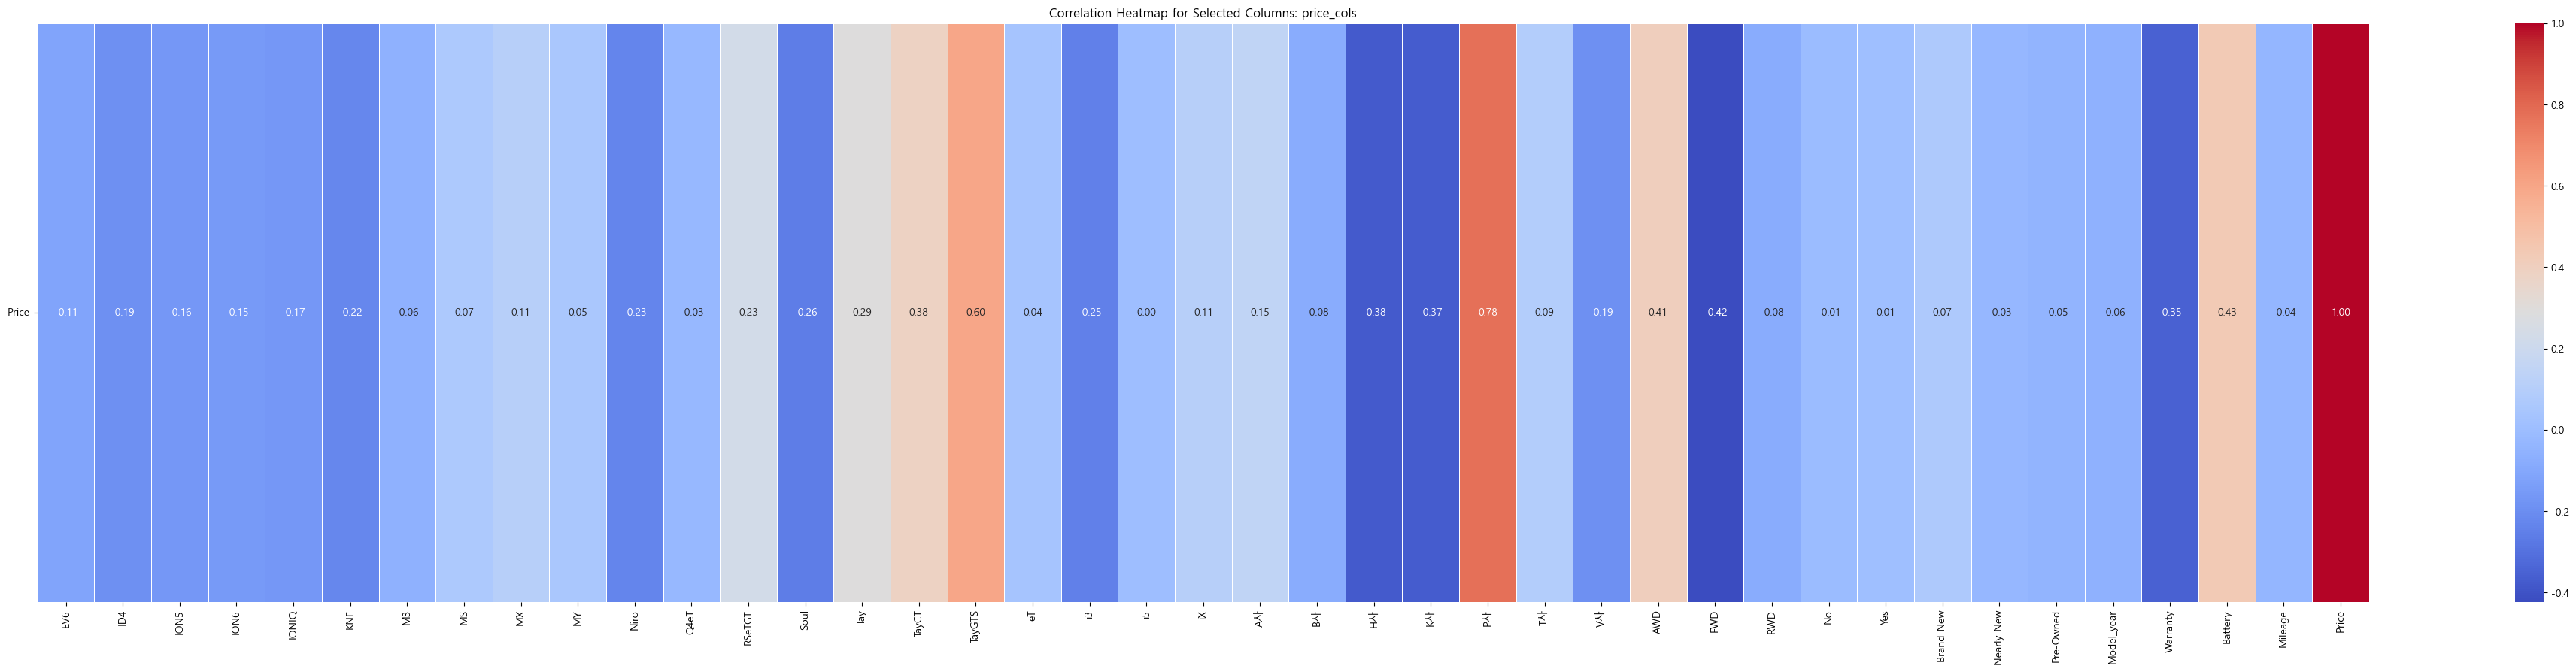

In [15]:
# ----------------------------------------------------------------------------------------------------
# 상관관계 "Price"중점으로 시각화 

# 전체 상관행렬에서 "Price" 컬럼만 추출
corr_selected = corr_matrix.loc[price_cols,:]
corr_selected = corr_selected.values.reshape(1, -1) 

# 전체 상관행렬을 시각화한 후, 그 중에서 원하는 부분을 선택하여 시각화
plt.figure(figsize=(50, 10))
sns.heatmap(corr_selected, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f", 
            linewidths=0.5,
            xticklabels=learning_encoding.columns,
            yticklabels=["Price"])
plt.title(f"Correlation Heatmap for Selected Columns: price_cols")
plt.xticks(rotation=90) 
plt.yticks(rotation=0) 
plt.show()
# ----------------------------------------------------------------------------------------------------